<a href="https://colab.research.google.com/github/Taker-7/gun4/blob/main/copy_of_rcgn_extended_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, RandomRotation, RandomFlip, RandomContrast, Rescaling, Input, Activation
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)
keras.utils.set_random_seed(17)

In [1]:
#!wget https://github.com/Taker-7/gun2/archive/refs/heads/main.zip
!wget https://github.com/Taker-7/gun4/archive/refs/heads/main.zip
!rm -rf data
!unzip "main.zip" -d .

--2024-06-18 03:54:39--  https://github.com/Taker-7/gun4/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Taker-7/gun4/zip/refs/heads/main [following]
--2024-06-18 03:54:39--  https://codeload.github.com/Taker-7/gun4/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [              <=>   ] 247.57M  29.5MB/s    in 8.2s    

2024-06-18 03:54:48 (30.3 MB/s) - ‘main.zip’ saved [259594015]

Archive:  main.zip
efca5e6af029ac0c12cb21509cc6ea5a3dedcd09
   creating: ./gun4-main/
  inflating: ./gun4-main/ak47.z01    
 extracting: ./gun4-main/ak47.z02    
 ex

In [7]:
!zip -s 0 ./gun4-main/ak47.zip --out ./gun4-main/ak47_full.zip
!unzip "./gun4-main/ak47_full.zip" -d ./data

 copying: ak47/
 copying: ak47/ak47.0.jpg
 copying: ak47/ak47.1.jpg
 copying: ak47/ak47.10.jpg
 copying: ak47/ak47.100.jpg
 copying: ak47/ak47.101.jpg
 copying: ak47/ak47.102.jpg
 copying: ak47/ak47.103.jpg
 copying: ak47/ak47.104.jpg
 copying: ak47/ak47.105.jpg
 copying: ak47/ak47.106.jpg
 copying: ak47/ak47.107.jpg
 copying: ak47/ak47.108.jpg
 copying: ak47/ak47.109.jpg
 copying: ak47/ak47.11.jpg
 copying: ak47/ak47.110.jpg
 copying: ak47/ak47.111.jpg
 copying: ak47/ak47.112.jpg
 copying: ak47/ak47.113.jpg
 copying: ak47/ak47.114.jpg
 copying: ak47/ak47.115.jpg
 copying: ak47/ak47.116.jpg
 copying: ak47/ak47.117.jpg
 copying: ak47/ak47.118.jpg
 copying: ak47/ak47.119.jpg
 copying: ak47/ak47.12.jpg
 copying: ak47/ak47.120.jpg
 copying: ak47/ak47.121.jpg
 copying: ak47/ak47.122.jpg
 copying: ak47/ak47.123.jpg
 copying: ak47/ak47.124.jpg
 copying: ak47/ak47.125.jpg
 copying: ak47/ak47.126.jpg
 copying: ak47/ak47.127.jpg
 copying: ak47/ak47.128.jpg
 copying: ak47/ak47.129.jpg
 copying: a

In [8]:
!zip -s 0 ./gun4-main/awp.zip --out ./gun4-main/awp_full.zip
!unzip "./gun4-main/awp_full.zip" -d ./data

 copying: awp/
 copying: awp/awp.0.jpg
 copying: awp/awp.1.jpg
 copying: awp/awp.10.jpg
 copying: awp/awp.100.jpg
 copying: awp/awp.101.jpg
 copying: awp/awp.102.jpg
 copying: awp/awp.103.jpg
 copying: awp/awp.104.jpg
 copying: awp/awp.105.jpg
 copying: awp/awp.106.jpg
 copying: awp/awp.107.jpg
 copying: awp/awp.108.jpg
 copying: awp/awp.109.jpg
 copying: awp/awp.11.jpg
 copying: awp/awp.110.jpg
 copying: awp/awp.111.jpg
 copying: awp/awp.112.jpg
 copying: awp/awp.113.jpg
 copying: awp/awp.114.jpg
 copying: awp/awp.115.jpg
 copying: awp/awp.116.jpg
 copying: awp/awp.117.jpg
 copying: awp/awp.118.jpg
 copying: awp/awp.119.jpg
 copying: awp/awp.12.jpg
 copying: awp/awp.120.jpg
 copying: awp/awp.121.jpg
 copying: awp/awp.122.jpg
 copying: awp/awp.123.jpg
 copying: awp/awp.124.jpg
 copying: awp/awp.125.jpg
 copying: awp/awp.126.jpg
 copying: awp/awp.127.jpg
 copying: awp/awp.128.jpg
 copying: awp/awp.129.jpg
 copying: awp/awp.13.jpg
 copying: awp/awp.130.jpg
 copying: awp/awp.131.jpg
 copy

In [ ]:
!cp -f ./gun4-main/csbin_model_v1_all.keras  ./csbin_model_v1_all.keras

In [9]:
!rm -rf gun4-main
!rm -f main.zip

In [10]:
cs_class_net = keras.models.load_model('csbin_model_v1_all.keras')

In [11]:
lyrs = cs_class_net.layers
nl = len(lyrs)

In [12]:
# Путь к данным

# Каталог с набором данных
data_dir = 'data'
# Каталог с данными для обучения
train_dir = 'data'
# Каталог с данными для проверки
val_dir = 'data'
# Каталог с данными для тестирования
test_dir = 'data'

# train_dir = 'data/newdata/train_rndm'
# test_dir = 'data/newdata/test_rndm'
# val_dir = 'data/newdata/val_rndm'

lm = 'binary'

In [13]:
img_h = 512
img_w = 512
size = (img_h, img_h)

In [14]:
input_shape = (img_h, img_w, 3)

In [15]:
train = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode=lm, image_size=size)

validate = keras.utils.image_dataset_from_directory(
    directory=val_dir,
    labels='inferred',
    label_mode=lm, image_size=size)

test = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode=lm, image_size=size)

Found 900 files belonging to 2 classes.
Found 900 files belonging to 2 classes.
Found 900 files belonging to 2 classes.


In [16]:
EPOCHS = 500
#BATCH_SIZE = 64
BATCH_SIZE = 900

data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(factor=0.1),
        tf.keras.layers.RandomContrast(factor=0.1),
        tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        tf.keras.layers.RandomBrightness(factor=0.2)
    ]
)

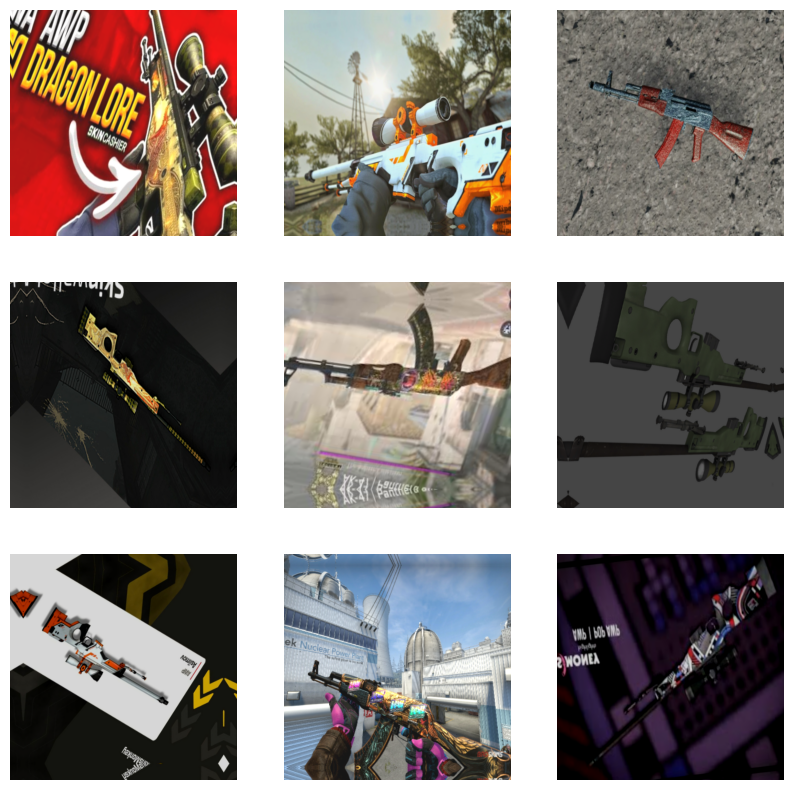

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

In [18]:
'''
Определение модели на основе трансферного обучения
'''

pretrained = Sequential([
    cs_class_net.get_layer(index=0),
    cs_class_net.get_layer(index=1),
    cs_class_net.get_layer(index=2),
    cs_class_net.get_layer(index=3),
    cs_class_net.get_layer(index=4),
    cs_class_net.get_layer(index=5),
    cs_class_net.get_layer(index=6),
    cs_class_net.get_layer(index=7),
    cs_class_net.get_layer(index=8),
    cs_class_net.get_layer(index=9),
    cs_class_net.get_layer(index=10),
    cs_class_net.get_layer(index=11),
    cs_class_net.get_layer(index=12),
    cs_class_net.get_layer(index=13)
])
# "фризим" тренированную модель
pretrained.trainable = False
pretrained.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# создаем входной слой новой модели
inputs = keras.Input(shape=input_shape)
# этот слой поменяет формат данных на пригодный для моей тренированной модели
rescale = MaxPooling2D((4, 4), strides=4)

# прогоняем через новые данные
#x = rescale(data_augmentation(inputs))
x = rescale(inputs)
#x = inputs
x = pretrained(x, training=False)

# слой новой модели который обмышляет полученные от тренированной модели данные и проводит классификацию
output = Dense(1, activation="sigmoid")(x)
# окончательно формируем новую модель(по сути новая модель - просто подгонка данных под старую)
# единственным новым обучаемым слоем является слой классификации
# таким образом я создал новую сеть приспособленную к новым данным на основе старой
model = keras.Model(inputs, output)

In [ ]:
model.compile(loss=f'{lm}_crossentropy',
              optimizer='adam', metrics =['accuracy'])

# Вывод сведений о слоях модели
model.summary()
# Компиляция модели

In [ ]:
history = model.fit(train, validation_data=validate,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    #verbose=2,
                    shuffle=True)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
#plt.xlim([0, 100])

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
#plt.xlim([0, 100])

In [ ]:
model.evaluate(validate)

In [ ]:
model.evaluate(test)

In [ ]:
img, labels = list(test)[0]
x_out = model.predict(img)

In [ ]:
# Display the results
c = 0
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
for i in range(20):
    if x_out[i] >= 0.5 and labels[i] == 1 or x_out[i] < 0.5 and labels[i] == 0:
        sign = '+'
        c += 1
    else: sign = '-'
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(img[i].numpy().astype("uint8"))
    ax.axis("off")
    ax.set_title(f"{'ak47' if x_out[i] <= 0.5 else 'awp'} ({sign})", fontsize=12)
plt.tight_layout()
print(c/20*100, '%')